In [1]:
from analysis_functions import Analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1) Entanglement in the 2-Qubit UQC

In [2]:
uqc_2qubit_cnot_path = "../../results/uqc_entanglement/2_qubit_uqc_cnot"
uqc_2qubit_cz_path = "../../results/uqc_entanglement/2_qubit_uqc_cz"
uqc_2qubit_noentangling_path = "../../results/uqc_entanglement/2_qubit_uqc_noentangling"

uqc_2qubit_cnot = Analysis(uqc_2qubit_cnot_path)
uqc_2qubit_cz = Analysis(uqc_2qubit_cz_path)
uqc_2qubit_noentangling = Analysis(uqc_2qubit_noentangling_path)

There are three types of possible encoding for the 2-qubit UQC:

1. $CZ gates
2. $CNOT gates
3. No entangling

## 1.1) Performance

In [3]:
uqc_2qubit_cnot_return = uqc_2qubit_cnot.get_rewards()
uqc_2qubit_cz_return = uqc_2qubit_cz.get_rewards()
uqc_2qubit_noentangling_return = uqc_2qubit_noentangling.get_rewards()

uqc_2qubit_cnot_return_mean = np.mean(uqc_2qubit_cnot_return, axis=0)
uqc_2qubit_cz_return_mean = np.mean(uqc_2qubit_cz_return, axis=0)
uqc_2qubit_noentangling_return_mean = np.mean(uqc_2qubit_noentangling_return, axis=0)

uqc_2qubit_cnot_return_std = np.std(uqc_2qubit_cnot_return, axis=0)
uqc_2qubit_cz_return_std = np.std(uqc_2qubit_cz_return, axis=0)
uqc_2qubit_noentangling_return_std = np.std(uqc_2qubit_noentangling_return, axis=0)

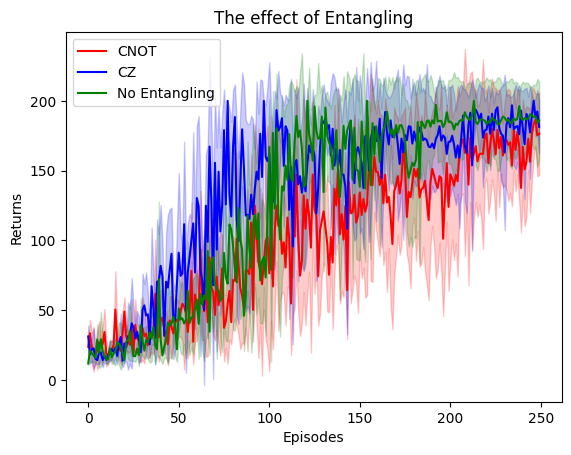

In [4]:
plt.plot(uqc_2qubit_cnot_return_mean, color = "red", label="CNOT")
plt.plot(uqc_2qubit_cz_return_mean, color = "blue", label="CZ")
plt.plot(uqc_2qubit_noentangling_return_mean, color = "green", label="No Entangling")
plt.fill_between(np.arange(len(uqc_2qubit_cnot_return_mean)), uqc_2qubit_cnot_return_mean - uqc_2qubit_cnot_return_std, uqc_2qubit_cnot_return_mean + uqc_2qubit_cnot_return_std, alpha=0.2, color="red")
plt.fill_between(np.arange(len(uqc_2qubit_cz_return_mean)), uqc_2qubit_cz_return_mean - uqc_2qubit_cz_return_std, uqc_2qubit_cz_return_mean + uqc_2qubit_cz_return_std, alpha=0.2, color="blue")
plt.fill_between(np.arange(len(uqc_2qubit_noentangling_return_mean)), uqc_2qubit_noentangling_return_mean - uqc_2qubit_noentangling_return_std, uqc_2qubit_noentangling_return_mean + uqc_2qubit_noentangling_return_std, alpha=0.2, color="green")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.title("The effect of Entangling")
plt.show()

Interestingly, CZ seems to have a better performance than CNOT but the difference is not that big and might be explained by variance.

## 1.2) Relative Parameter Change

In [5]:
uqc_2qubit_cnot_parameters_relative_change = uqc_2qubit_cnot.get_parameters_relative_change()
uqc_2qubit_cz_parameters_relative_change = uqc_2qubit_cz.get_parameters_relative_change()
uqc_2qubit_noentangling_parameters_relative_change = uqc_2qubit_noentangling.get_parameters_relative_change()

def filter_lists(lists):
    min_length = 10000  # Find the length of the smallest list
    
    filtered_lists = []
    for lst in lists:
        filtered_lst = lst[:min_length]  # Take only the first min_length elements
        filtered_lists.append(filtered_lst)  # Add the filtered list to the result
    
    return filtered_lists

uqc_2qubit_cnot_parameters_relative_change_filtered = filter_lists(uqc_2qubit_cnot_parameters_relative_change)
uqc_2qubit_cz_parameters_relative_change_filtered = filter_lists(uqc_2qubit_cz_parameters_relative_change)
uqc_2qubit_noentangling_parameters_relative_change_filtered = filter_lists(uqc_2qubit_noentangling_parameters_relative_change)

uqc_2qubit_cnot_parameters_relative_change_mean = np.mean(uqc_2qubit_cnot_parameters_relative_change_filtered, axis=0)
uqc_2qubit_cz_parameters_relative_change_mean = np.mean(uqc_2qubit_cz_parameters_relative_change_filtered, axis=0)
uqc_2qubit_noentangling_parameters_relative_change_mean = np.mean(uqc_2qubit_noentangling_parameters_relative_change_filtered, axis=0)

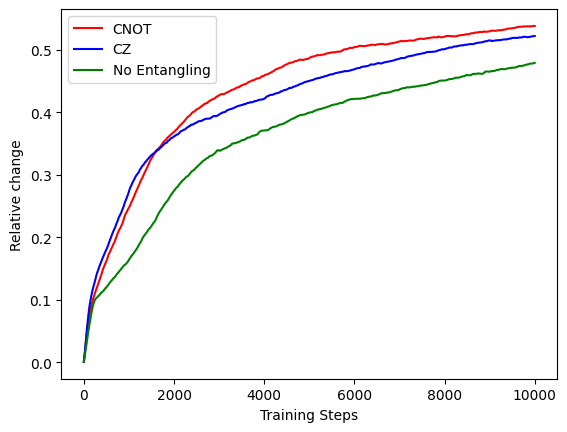

In [6]:
plt.plot(uqc_2qubit_cnot_parameters_relative_change_mean, color = "red", label="CNOT")
plt.plot(uqc_2qubit_cz_parameters_relative_change_mean, color = "blue", label="CZ")
plt.plot(uqc_2qubit_noentangling_parameters_relative_change_mean, color = "green", label="No Entangling")
plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Relative change")
plt.show()

Interestingly, the parameters changed more for the CNOT entangling than for the CZ one.

## 1.3) Gradients

In [7]:
uqc_2qubit_cnot_mean_gradients, uqc_2qubit_cnot_std_gradients = uqc_2qubit_cnot.get_gradients_all_params()
uqc_2qubit_cz_mean_gradients, uqc_2qubit_cz_std_gradients = uqc_2qubit_cz.get_gradients_all_params()
uqc_2qubit_noentangling_mean_gradients, uqc_2qubit_noentangling_std_gradients = uqc_2qubit_noentangling.get_gradients_all_params()

In [10]:
uqc_2qubit_cnot_mean_gradients_smoothed = pd.Series(uqc_2qubit_cnot_mean_gradients).rolling(250).mean()
uqc_2qubit_cz_mean_gradients_smoothed = pd.Series(uqc_2qubit_cz_mean_gradients).rolling(250).mean()
uqc_2qubit_noentangling_mean_gradients_smoothed = pd.Series(uqc_2qubit_noentangling_mean_gradients).rolling(250).mean()

uqc_2qubit_cnot_std_gradients_smoothed = pd.Series(uqc_2qubit_cnot_std_gradients).rolling(250).mean()
uqc_2qubit_cz_std_gradients_smoothed = pd.Series(uqc_2qubit_cz_std_gradients).rolling(250).mean()
uqc_2qubit_noentangling_std_gradients_smoothed = pd.Series(uqc_2qubit_noentangling_std_gradients).rolling(250).mean()

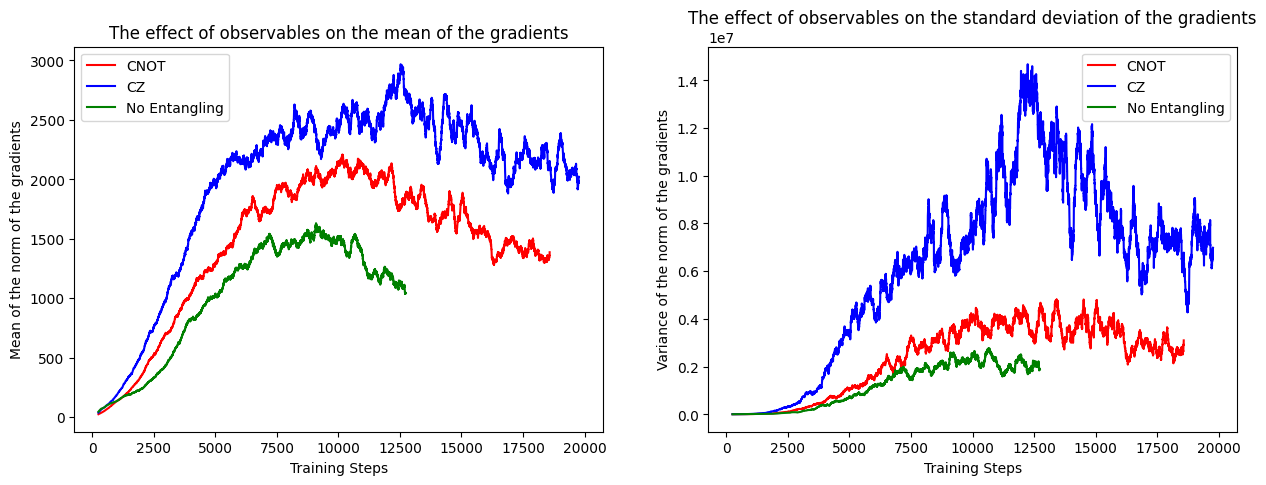

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(uqc_2qubit_cnot_mean_gradients_smoothed, color = "red", label="CNOT")
axs[0].plot(uqc_2qubit_cz_mean_gradients_smoothed, color = "blue", label="CZ")
axs[0].plot(uqc_2qubit_noentangling_mean_gradients_smoothed, color = "green", label="No Entangling")
axs[0].legend()
axs[0].set_xlabel("Training Steps")
axs[0].set_ylabel("Mean of the norm of the gradients")
axs[0].set_title("The effect of observables on the mean of the gradients")

axs[1].plot(uqc_2qubit_cnot_std_gradients_smoothed, color = "red", label="CNOT")
axs[1].plot(uqc_2qubit_cz_std_gradients_smoothed, color = "blue", label="CZ")
axs[1].plot(uqc_2qubit_noentangling_std_gradients_smoothed, color = "green", label="No Entangling")
axs[1].legend()
axs[1].set_xlabel("Training Steps")
axs[1].set_ylabel("Variance of the norm of the gradients")
axs[1].set_title("The effect of observables on the standard deviation of the gradients")

plt.show()
